In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("C:\\Users\\Pratibh\\OneDrive\\Desktop\Data Scien\\gold_monthly_csv.csv")

In [4]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [6]:
df.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


In [7]:
df.shape

(847, 2)

In [8]:
# print(f'Date range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][846]}')
print(f'Date range of gold prices available from - {df.loc[:, "Date"][0]} to {df.loc[:, "Date"][846]}')


Date range of gold prices available from - 1950-01 to 2020-07


In [9]:
date=pd.date_range(start='1/1/1950',end='8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [10]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [11]:
df['month']=date
df.drop('Date',axis=1,inplace=True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


In [12]:
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


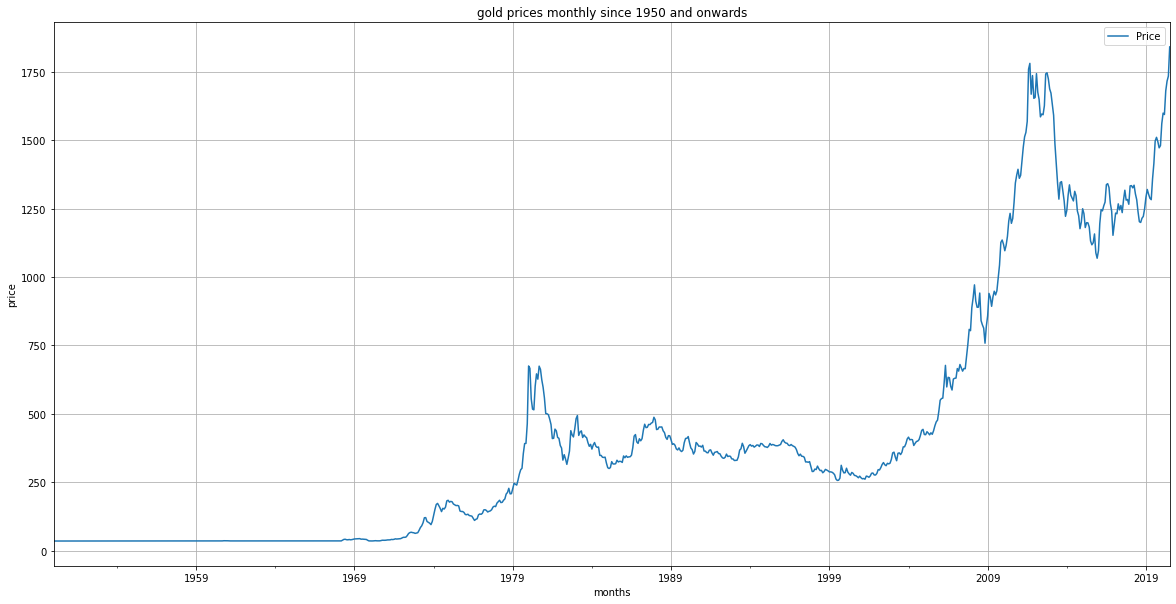

In [13]:
df.plot(figsize=(20,10))
plt.title('gold prices monthly since 1950 and onwards')
plt.xlabel('months')
plt.ylabel('price')
plt.grid()
plt.show()

In [14]:
round(df.describe(),2)

,Price
count,847.00
mean,416.56
std,453.67
min,34.49
25%,35.19
50%,319.62
75%,447.03
max,1840.81


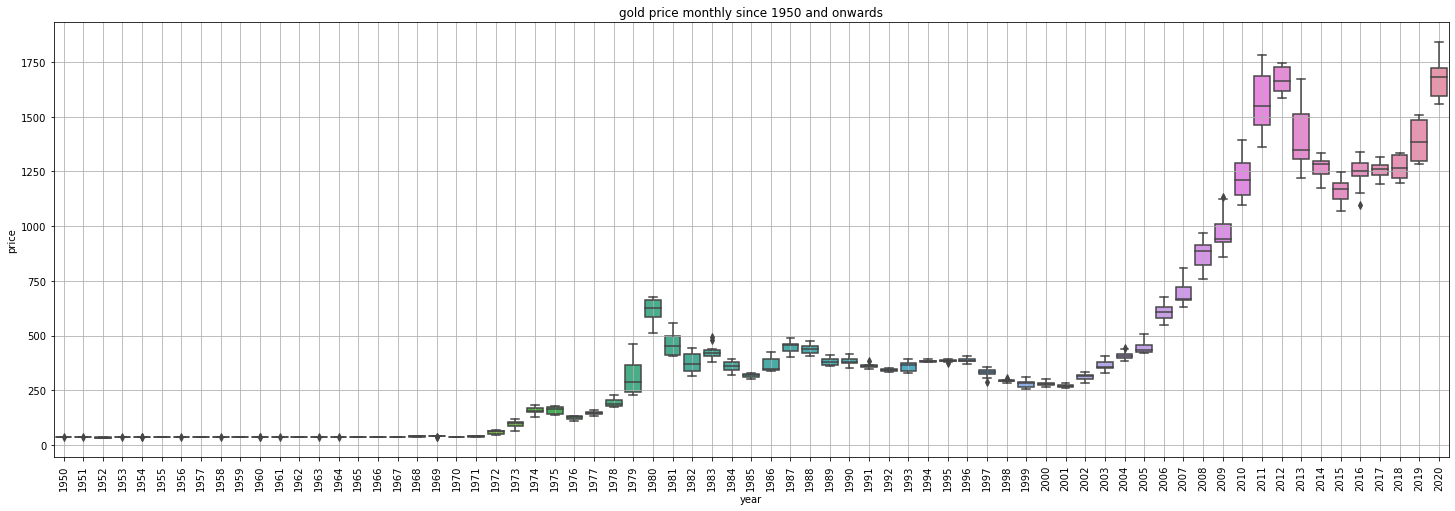

In [15]:
_,ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.title('gold price monthly since 1950 and onwards')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.grid()
plt.show()

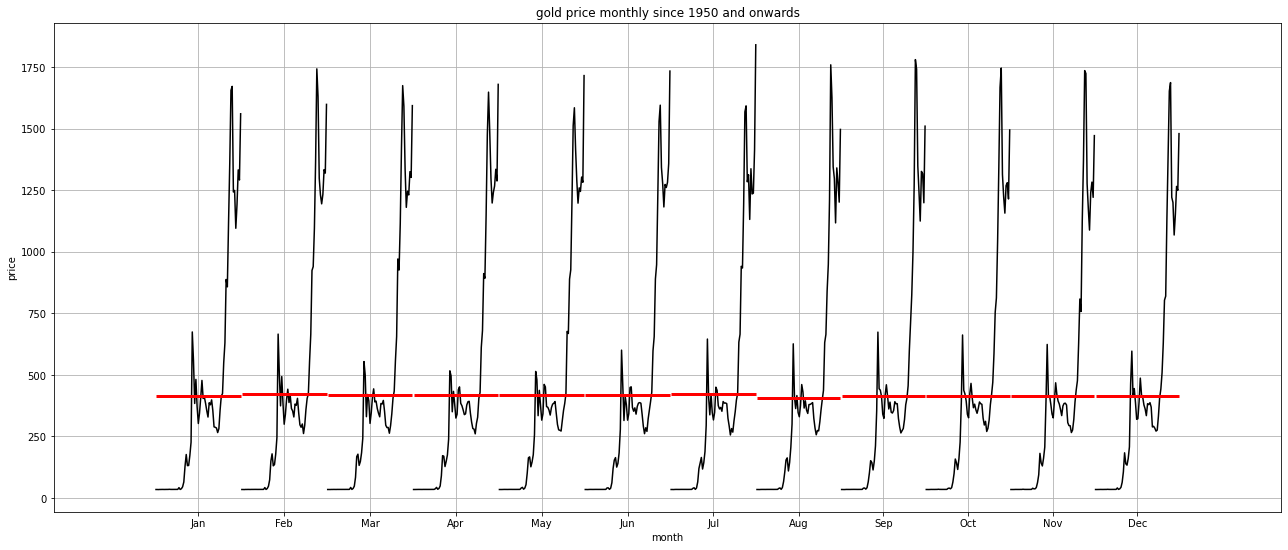

In [16]:
from statsmodels.graphics.tsaplots import month_plot
fig,ax=plt.subplots(figsize=(22,9))
month_plot(df,ylabel='gold price',ax=ax)
plt.title('gold price monthly since 1950 and onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

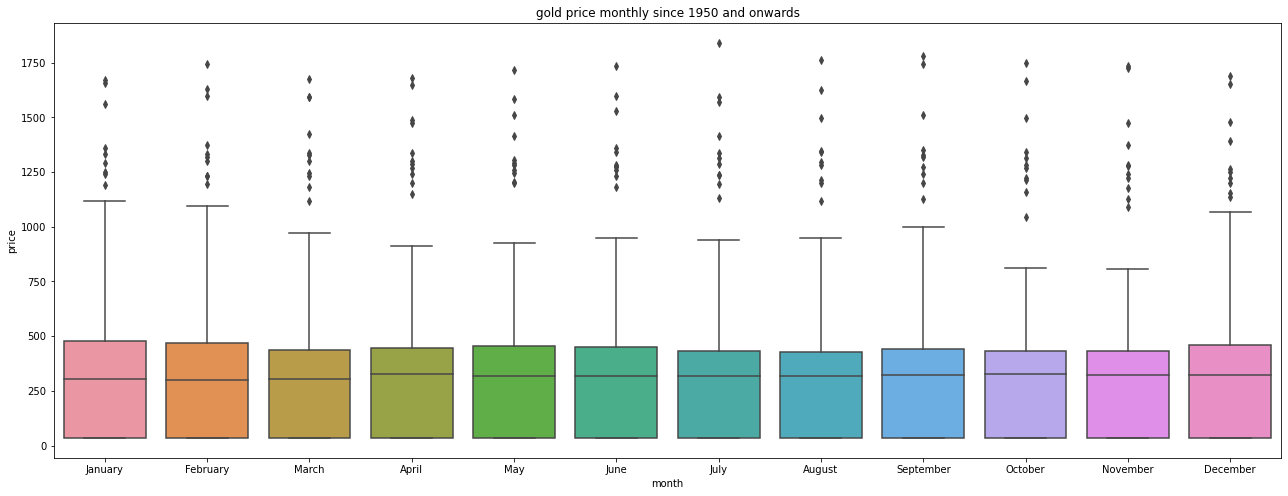

In [17]:
_,ax=plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0],ax=ax)
plt.title('gold price monthly since 1950 and onwards')
plt.xlabel('month')
plt.ylabel('price')
# plt.grid()
plt.show()

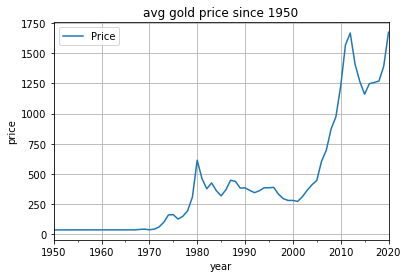

In [20]:
df_yearly_sum=df.resample('A').mean()
df_yearly_sum.plot()
plt.title('avg gold price since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid()

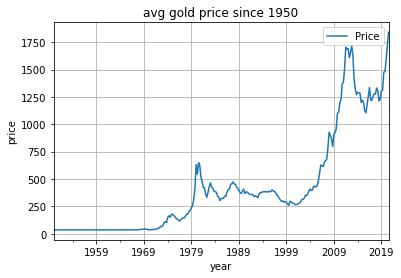

In [22]:
df_quarterly_sum=df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('avg gold price since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid()

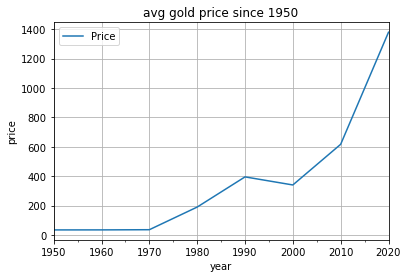

In [23]:
df_decade_sum=df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('avg gold price since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid()

In [25]:
df_t=df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_t=df_t.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index=True)
df_t['cov_pct']=((df_t['Std']/df_t['Mean'])*100).round(2)
df_t

,Mean,Std,cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24
...,...,...,...
2016,1248.161833,73.454098,5.88
2017,1257.848583,32.529524,2.59
2018,1269.852583,54.900304,4.32


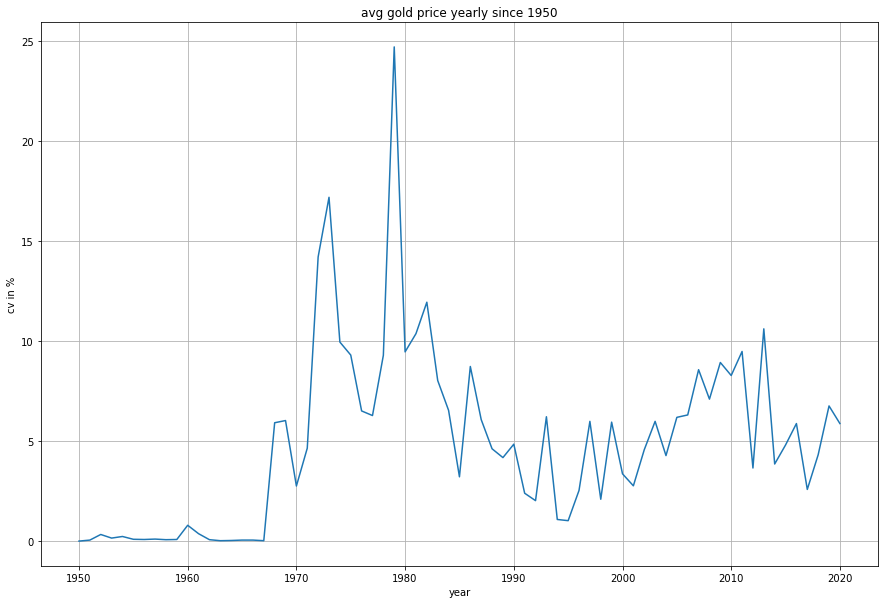

In [28]:
fig,ax=plt.subplots(figsize=(15,10))
df_t['cov_pct'].plot()
plt.title('avg gold price yearly since 1950')
plt.xlabel('year')
plt.ylabel('cv in %')
plt.grid()
plt.show()

In [29]:
train=df[df.index.year<=2015]
test=df[df.index.year>2015]


In [31]:
train.shape

(792, 1)

In [32]:
test.shape

(55, 1)

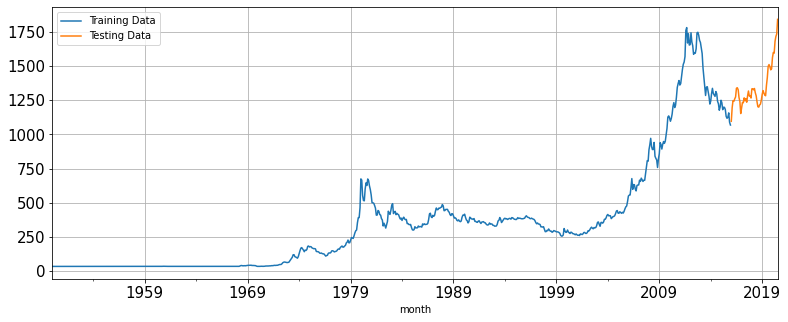

In [34]:
train['Price'].plot(figsize=(13,5),fontsize=15)
test['Price'].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend(['Training Data','Testing Data'])
plt.show()

In [35]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)

(792, 55)

In [40]:
lr_train=train.copy()
lr_test=test.copy()

In [41]:
lr_train['time']=train_time
lr_test['time']=test_time

In [42]:
lr=LinearRegression()
lr.fit(lr_train[['time']],lr_train['Price'].values)

LinearRegression()

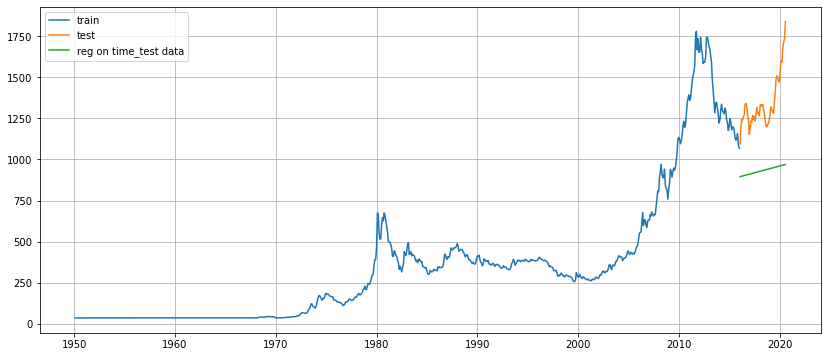

In [45]:
test_predictions_model=lr.predict(lr_test[['time']])
lr_test['forecast']=test_predictions_model
plt.figure(figsize=(14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(lr_test['forecast'],label='reg on time_test data')
plt.legend(loc='best')
plt.grid()

In [46]:
def mape(actual,pred):
    return round((np.mean(abs(actual-pred)/actual))*100,2)

In [48]:
mape_model_test=mape(test['Price'].values,test_predictions_model)
print('mape is %3.3f'%(mape_model_test),'%')

mape is 29.760 %


In [54]:
results=pd.DataFrame({'TEst MApe(%)':[mape_model_test]},index=['RegressionOnTime'])
results

,TEst MApe(%)
RegressionOnTime,29.76


In [59]:
final_model=ExponentialSmoothing(df,
                                 trend='additive',
                                 seasonal='additive').fit(smoothing_level=0.4,
                                                         smoothing_trend=0.3,
                                                         smoothing_seasonal=0.6)

In [63]:
Mape_final_model=mape(df['Price'].values,final_model.fittedvalues)
print('MApe:',Mape_final_model)

MApe: 17.24


In [65]:
predictions=final_model.forecast(steps=len(test))


In [76]:
pred_df=pd.DataFrame({'lower_ci':predictions-1.96*np.std(final_model.resid,ddof=1),
                     'prediction':predictions,
                     'upper_ci':predictions+1.96*np.std(final_model.resid,ddof=1)})
pred_df

,lower_ci,prediction,upper_ci
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154
2021-01-31,1514.403893,1622.554865,1730.705837
2021-02-28,1545.337867,1653.488839,1761.639811
2021-03-31,1556.749789,1664.900761,1773.051733
2021-04-30,1648.295729,1756.446701,1864.597673
2021-05-31,1694.212521,1802.363493,1910.514465


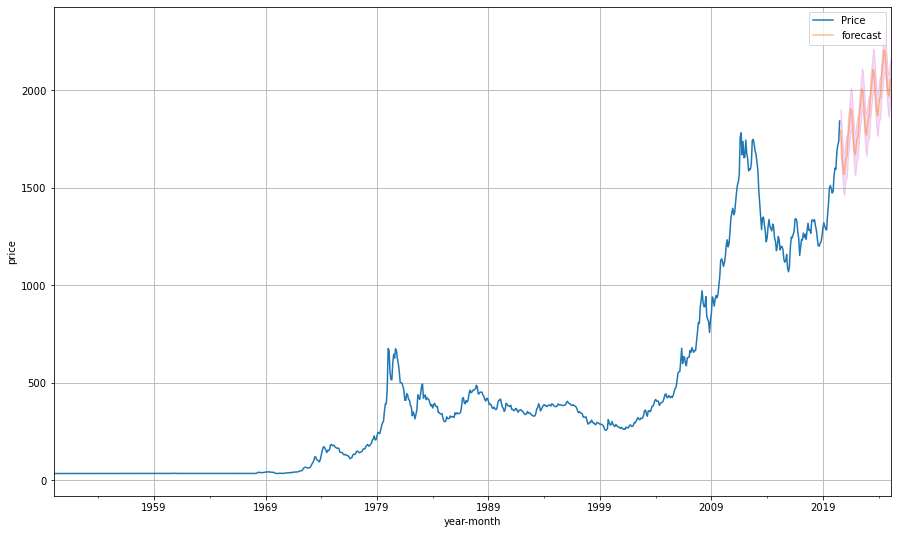

In [79]:
axis=df.plot(label='actual',figsize=(15,9))
pred_df['prediction'].plot(ax=axis,label='forecast',alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_ci'],pred_df['upper_ci'],color='m',alpha=.15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid()
plt.show()